In [11]:
# pip install matplotlib numpy pandas

- Wykreślić zależności R = ƒ(t) dla przewodnika i półprzewodnika.
- Dla półprzewodnika wyznaczyć ln(1/R). Zamienić jednostkę temperatury na kelwiny oraz obliczyć (1/T).
- Wykonać wykres zależności ln (1/R) = ƒ(1/T).
- Wyznaczyć współczynnik nachylenia otrzymanej prostej wraz z jego błędem, wykorzystując metodę regresji liniowej.
- Wykorzystując obliczony współczynnik nachylenia, obliczyć energię aktywacji (EA). Wyznaczyć niepewność ΔEA. Otrzymany wynik wyrazić w dżulach oraz elektronowoltach

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
import math

In [3]:
blad_temperatury = 0.1 # [K]
# nie mam pomysłu jak zrobić błędy pomiarowe multimetru
wsp_studenta_fishera_68 = [1, 1, 1.837,1.321,1.197,1.141,1.11,1.09,1.077,1.066,1.059]

In [4]:
class Metric:
    def __init__(self,dictionary):
        self.__dict__.update(dictionary)
        self.error = max(3*np.std(values)*wsp_studenta_fishera_68[len(values)],self.error)

    def __init__(self, values, error, unit):
        self.values = values
        self.error = max(3*np.std(values)*wsp_studenta_fishera_68[len(values)],error)
        self.unit = unit

class Axis:
    major_tick_spacing = None
    minor_tick_spacing = None
    min = None
    max = None

    def __init__(self, dictionary):
        self.__dict__.update(dictionary)

class GridSettings:
    x_axis = Axis({})
    y_axis = Axis({})

    def __init__(self, dictionary):
        self.__dict__.update(dictionary)


class PhysicsObject:

    def __init__(self, ascii_name, conjugated_name):
        self.ascii_name = ascii_name
        self.conjugated_name = conjugated_name
    

class Nic:
    pass

In [5]:
def make_error_boxes(ax, xdata, ydata, xerror, yerror, facecolor='b',
                     edgecolor='none', alpha=0.5):

    # Loop over data points; create box from errors at each point
    errorboxes = [Rectangle((x - xe[0], y - ye[0]), xe.sum(), ye.sum())
                  for x, y, xe, ye in zip(xdata, ydata, xerror.T, yerror.T)]

    # Create patch collection with specified colour/alpha
    pc = PatchCollection(errorboxes, facecolor=facecolor, alpha=alpha,
                         edgecolor=edgecolor, zorder=2)

    # Add collection to axes
    ax.add_collection(pc)

    return ax


In [6]:
przewodnik = PhysicsObject("przewodnik", "przewodnika")
polprzewodnik = PhysicsObject("polprzewodnik", "półprzewodnika")

In [7]:
for object in [przewodnik, polprzewodnik]:
    object.plik = f"pomiary_{object.ascii_name}.csv"
    object.pomiary = pd.read_csv(object.plik)
    #print(object.pomiary)


In [8]:
for object in [przewodnik, polprzewodnik]:
    object.n = object.pomiary.shape[0]
    object.dane = pd.DataFrame()
    object.dane["T [K]"] = [e+274.15 for e in object.pomiary["T [°C]"]]
    object.dane["blad T [K]"] = [blad_temperatury]*object.n
    object.dane["R [Ω]"] = object.pomiary["R [Ω]"]
    object.dane["blad R [Ω]"] = object.pomiary["blad R [Ω]"]

    #print(object.dane)
    

In [9]:
for object in [przewodnik, polprzewodnik]:
    object.x = object.dane["T [K]"]
    object.xerr = np.array([object.dane["blad T [K]"], object.dane["blad T [K]"]])
    object.y = object.dane["R [Ω]"]
    object.yerr = np.array([object.dane["blad R [Ω]"], object.dane["blad R [Ω]"]])
    print(object.xerr)
    

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]


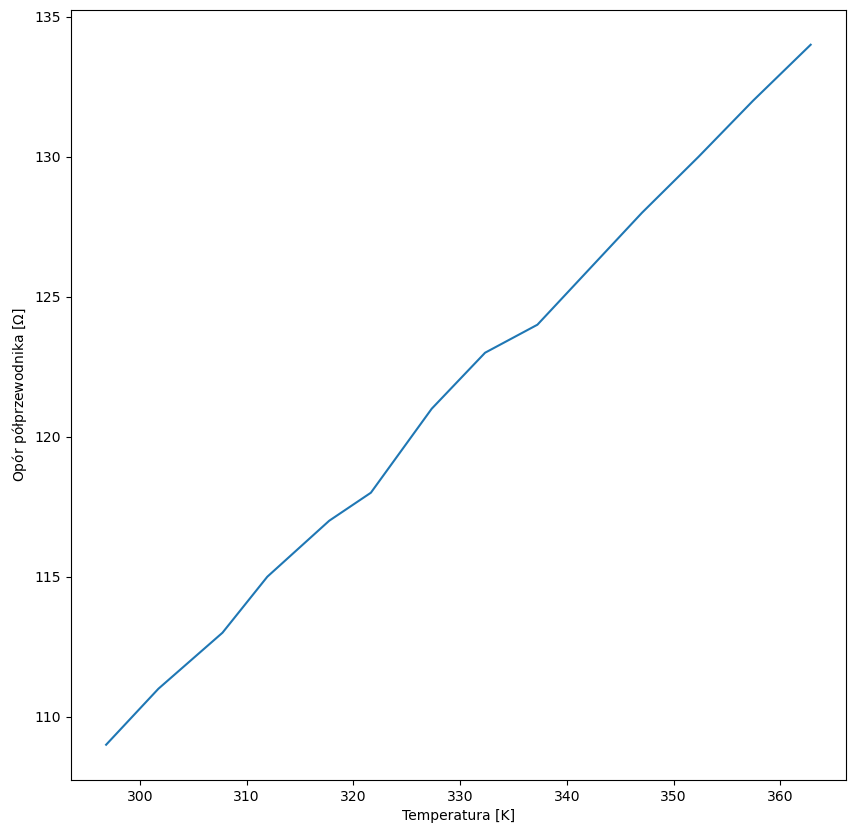

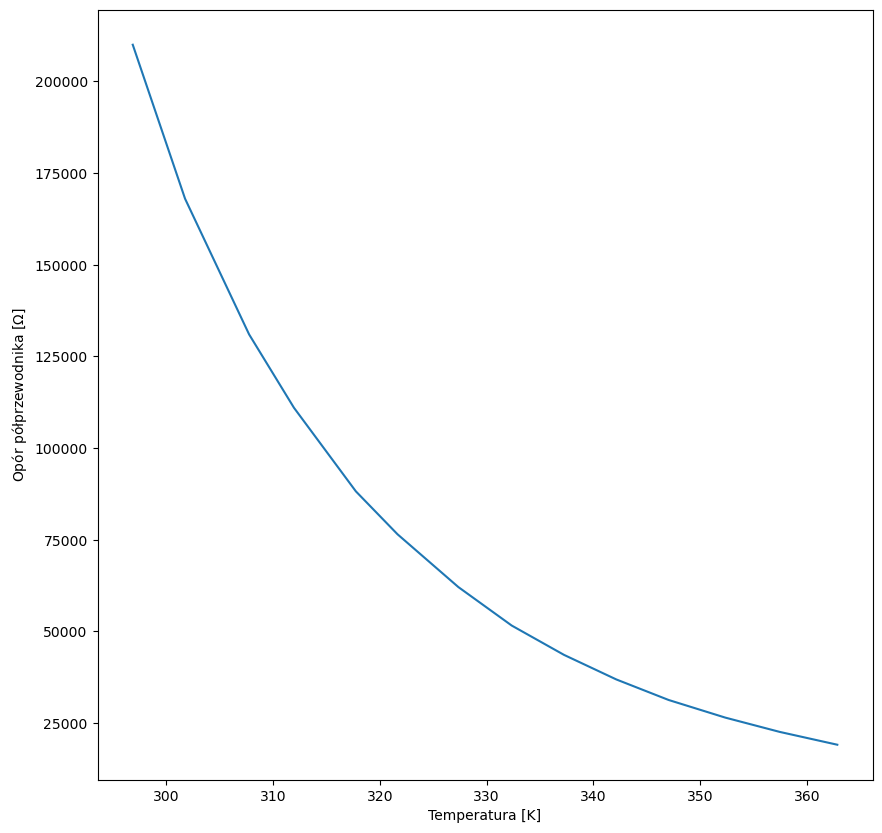

In [18]:
for obiekt in [przewodnik, polprzewodnik]:
    # Create figure and axes
    fig, ax = plt.subplots(1)

    # Set plot size
    fig.set_figwidth(10) 
    fig.set_figheight(10)

    # Grid
    # X axis
    # major_xtick_spacing, minor_xtick_spacing, xmin, xmax = obiekt.grid.x_axis.__dict__.values()

    # major_xticks = np.arange(xmin,xmax+minor_xtick_spacing,major_xtick_spacing)
    # minor_xticks = np.arange(xmin,xmax+minor_xtick_spacing,minor_xtick_spacing)

    # # Y axis
    # major_ytick_spacing, minor_ytick_spacing, ymin, ymax = obiekt.grid.y_axis.__dict__.values()

    # major_yticks = np.arange(ymin,ymax+minor_ytick_spacing,major_ytick_spacing)
    # minor_yticks = np.arange(ymin,ymax+minor_ytick_spacing,minor_ytick_spacing)

    # ax.set_xticks(major_xticks)
    # ax.set_xticks(minor_xticks, minor=True)
    # ax.set_yticks(major_yticks)
    # ax.set_yticks(minor_yticks, minor=True)

    # ax.grid(which='minor', alpha=0.2)
    # ax.grid(which='major', alpha=0.6)


    # Call function to create error boxes
    #_ = make_error_boxes(ax, obiekt.x, obiekt.y, obiekt.xerr, obiekt.yerr)
    
    plt.plot(obiekt.x,obiekt.y)  # plot regression line

    #plt.axis([xmin-minor_xtick_spacing,xmax+minor_xtick_spacing, ymin-minor_ytick_spacing,ymax])

    # Adding labels
    ax.set_ylabel("Opór "+object.conjugated_nameobject.dane["blad R [Ω]"]+r" [$\Omega$]")
    ax.set_xlabel(f"Temperatura [K]")

    # equation
    #plt.text(np.median(obiekt.x),np.median(obiekt.y), f"R = ƒ(t)")

    plt.savefig(f"wykres_opor_{obiekt.ascii_name}.svg",format="svg", bbox_inches='tight', pad_inches=0)
    plt.show()


In [29]:
for object in [polprzewodnik]:
    object.dane["1/T [1/K]"] = [1/e for e in object.dane["T [K]"]]
    object.dane["blad 1/T [1/K]"] = [dT/T**2 for (dT,T) in zip(object.dane["blad T [K]"],object.dane["T [K]"])]
    object.dane["ln(1/R) [ln(1/Ω)]"] = [-np.log(e) for e in object.dane["R [Ω]"]]
    object.dane["blad ln(1/R) [ln(1/Ω)]"] = [dR/R for (dR,R) in zip(object.dane["blad R [Ω]"],object.dane["R [Ω]"])]
    print(object.dane)

     T [K]  blad T [K]   R [Ω]  blad R [Ω]  1/T [1/K]  blad 1/T [1/K]  \
0   296.85         0.1  210000      3680.0   0.003369    1.134817e-06   
1   301.75         0.1  168000      3344.0   0.003314    1.098261e-06   
2   307.75         0.1  131000      3048.0   0.003249    1.055854e-06   
3   311.95         0.1  111000      2888.0   0.003206    1.027614e-06   
4   317.75         0.1   88200       905.6   0.003147    9.904416e-07   
5   321.65         0.1   76500       812.0   0.003109    9.665691e-07   
6   327.35         0.1   62100       696.8   0.003055    9.332012e-07   
7   332.35         0.1   51600       612.8   0.003009    9.053336e-07   
8   337.25         0.1   43600       548.8   0.002965    8.792170e-07   
9   342.15         0.1   36900       495.2   0.002923    8.542144e-07   
10  347.05         0.1   31300       450.4   0.002881    8.302634e-07   
11  352.35         0.1   26500       412.0   0.002838    8.054739e-07   
12  357.45         0.1   22600       380.8   0.0027

In [9]:
for obiekt in [pret,dysk]:
    obiekt.x = np.array([R**2 for R in obiekt.dane["R [m]"]])
    obiekt.xerr = [max(2*abs(blad_rozstaw)*obiekt.dane["R [m]"][i], blad_rozstaw**2) for i in range(obiekt.n)]
    obiekt.xerr = np.ones((2,obiekt.n))*obiekt.xerr

In [10]:
for obiekt in [pret]:


    # y = T^2
    obiekt.y = np.array([(row_mean)**2 for row_mean in obiekt.dane["mean(T) [s]"]])
    obiekt.yerr = [ 2*abs(error/mean)*yi for error,mean,yi in zip(obiekt.dane["error(T) [s]"], obiekt.dane["mean(T) [s]"],obiekt.y) ]
    obiekt.yerr = np.array([obiekt.yerr, obiekt.yerr])

    
    # Calculate linear regression, intercept calculated normally
    degrees = [0,1] # model y = ax + b
    matrix = np.stack([obiekt.x**d for d in degrees], axis=-1)
    result = np.linalg.lstsq(matrix,obiekt.y,rcond=None)
    
    obiekt.a = result[0][1]
    obiekt.b = result[0][0]
    residuals = result[1][0]

    n = obiekt.n
    obiekt.blad_a = math.sqrt((residuals * n) / ((n-2)*(n*sum(obiekt.x**2) - (sum(obiekt.x))**2)))
    #Math.sqrt(se2/(n-2))*Math.sqrt(n/(n*sx2 - sx*sx))
    
    obiekt.blad_b = math.sqrt((residuals*sum(obiekt.x**2)) / ((n-2)*(n*sum(obiekt.x**2)-(sum(obiekt.x)**2))))
    #(Math.sqrt(se2/(n-2))*Math.sqrt(sx2/(n*sx2 - sx*sx)

    print(obiekt.ascii_name)
    print(f"współczynnik kierunkowy a: {obiekt.a} [s^2/m^2]")
    print("b: ", obiekt.b, "[s^2]")
    print(f"błąd wsp. kierunkowego a: {obiekt.blad_a}")
    print(f"błąd b: ", obiekt.blad_b)
    print("")

    print(obiekt.xerr)

    reg_pret = pd.DataFrame({"D^2":obiekt.x, "T^2":obiekt.y, "blad D^2": obiekt.xerr[0], "blad T^2": obiekt.yerr[0]})
    with open("reg_pret.csv", "w") as plik:
        plik.write(reg_pret.to_csv(index=False))
    


pret
współczynnik kierunkowy a: 757.7332405372405 [s^2/m^2]
b:  4.92481406349207 [s^2]
błąd wsp. kierunkowego a: 13.69183237739997
błąd b:  0.6170825461471701

[[1.e-06 1.e-04 2.e-04 3.e-04 4.e-04 5.e-04 6.e-04]
 [1.e-06 1.e-04 2.e-04 3.e-04 4.e-04 5.e-04 6.e-04]]


In [13]:
for obiekt in [dysk]:

    # y = T^2
    obiekt.y = dysk.dane["I pomiar [kg*m^2]"].to_numpy()
    obiekt.yerr = np.array([dysk.dane["blad I pomiar [kg*m^2]"], dysk.dane["blad I pomiar [kg*m^2]"]])

    # Calculate linear regression, intercept calculated normally
    degrees = [0,1] # model y = ax + b
    matrix = np.stack([obiekt.x**d for d in degrees], axis=-1)
    result = np.linalg.lstsq(matrix,obiekt.y,rcond=None)
    
    obiekt.a = result[0][1]
    obiekt.b = result[0][0]
    residuals = result[1][0]

    n = obiekt.n
    obiekt.blad_a = math.sqrt((residuals * n) / ((n-2)*(n*sum(obiekt.x**2) - (sum(obiekt.x))**2)))
    
    obiekt.blad_b = math.sqrt((residuals*sum(obiekt.x**2)) / ((n-2)*(n*sum(obiekt.x**2)-(sum(obiekt.x)**2))))
    #(Math.sqrt(se2/(n-2))*Math.sqrt(sx2/(n*sx2 - sx*sx)

    
    print(obiekt.ascii_name)
    print(f"współczynnik kierunkowy a: {obiekt.a} [kg]")
    print("b: ", obiekt.b, "[kg*m^2]")
    print(f"błąd wsp. kierunkowego a: {obiekt.blad_a}")
    print(f"błąd b: ", obiekt.blad_b)
    print("")

    reg_dysk = pd.DataFrame({"d^2":obiekt.x, "I pomiar":obiekt.y, "b d^2": obiekt.xerr[0], "b I p": obiekt.yerr[0]})
    print(reg_dysk)

dysk
współczynnik kierunkowy a: 0.4960888270644558 [kg]
b:  0.005150735375703237 [kg*m^2]
błąd wsp. kierunkowego a: 0.026776124264727023
błąd b:  0.0002589404890731893

      d^2  I pomiar     b d^2     b I p
0  0.0000  0.005213  0.000001  0.000631
1  0.0004  0.005599  0.000040  0.000557
2  0.0016  0.006181  0.000080  0.000360
3  0.0036  0.006859  0.000120  0.000394
4  0.0064  0.008418  0.000160  0.000614
5  0.0100  0.009294  0.000200  0.000944
6  0.0144  0.011832  0.000240  0.000492
7  0.0196  0.015590  0.000280  0.001075


In [14]:
teoria = Nic()
for obiekt in [teoria]:

    n = dysk.n

    obiekt.x = np.array([R**2 for R in dysk.dane["R [m]"]])
    obiekt.xerr = 2*abs(blad_rozstaw/dysk.dane["R [m]"][1])*obiekt.x[1]
    obiekt.xerr = np.ones((2,n))*obiekt.xerr

    # y = T^2
    obiekt.y = dysk.dane["I teoria [kg*m^2]"].to_numpy()
    obiekt.yerr = np.array([dysk.dane["blad I teoria [kg*m^2]"], dysk.dane["blad I teoria [kg*m^2]"]])

    # Calculate linear regression, intercept calculated normally
    degrees = [0,1] # model y = ax + b
    matrix = np.stack([obiekt.x**d for d in degrees], axis=-1)
    result = np.linalg.lstsq(matrix,obiekt.y,rcond=None)
    
    obiekt.a = result[0][1]
    obiekt.b = result[0][0]
    residuals = result[1][0]
    
    obiekt.blad_a = math.sqrt((residuals * n) / ((n-2)*(n*sum(obiekt.x**2) - (sum(obiekt.x))**2)))
    
    obiekt.blad_b = math.sqrt((residuals*sum(obiekt.x**2)) / ((n-2)*(n*sum(obiekt.x**2)-(sum(obiekt.x)**2))))
    #(Math.sqrt(se2/(n-2))*Math.sqrt(sx2/(n*sx2 - sx*sx)

    print("Teoria dysk")
    print(f"współczynnik kierunkowy a: {obiekt.a} [kg]")
    print("b: ", obiekt.b, "[kg*m^2]")
    print(f"błąd wsp. kierunkowego a: {obiekt.blad_a}")
    print(f"błąd b: ", obiekt.blad_b)
    print("")


Teoria dysk
współczynnik kierunkowy a: 0.43533333333333346 [kg]
b:  0.005572266666666665 [kg*m^2]
błąd wsp. kierunkowego a: 3.6106571309537167e-17
błąd b:  3.491712669545626e-19



In [ ]:
for object in [przewodnik, polprzewodnik]:
    print("Dane "+object.ascii_name)
    print(object.dane)
    with open(object.ascii_name+"_dane.csv", "w") as plik:
        plik.write(object.dane.to_csv(index=False))

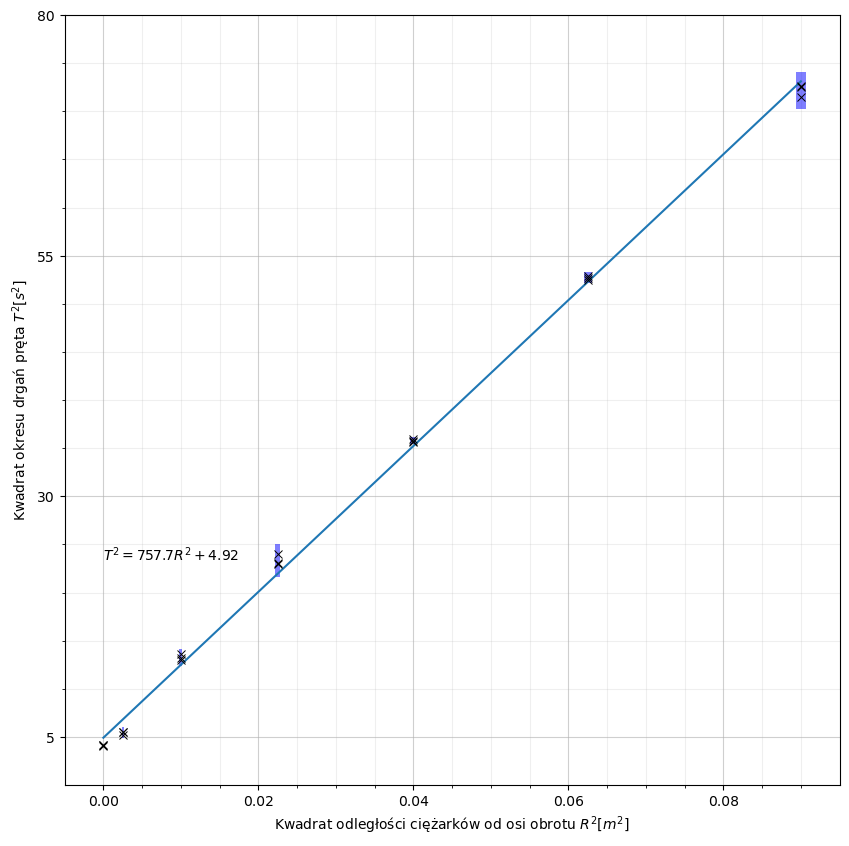

In [16]:
for obiekt in [pret]:
    # Create figure and axes
    fig, ax = plt.subplots(1)

    # Set plot size
    fig.set_figwidth(10) 
    fig.set_figheight(10)

    # Grid
    # X axis
    major_xtick_spacing, minor_xtick_spacing, xmin, xmax = obiekt.grid.x_axis.__dict__.values()

    major_xticks = np.arange(xmin,xmax+minor_xtick_spacing,major_xtick_spacing)
    minor_xticks = np.arange(xmin,xmax+minor_xtick_spacing,minor_xtick_spacing)

    # Y axis
    major_ytick_spacing, minor_ytick_spacing, ymin, ymax = obiekt.grid.y_axis.__dict__.values()

    major_yticks = np.arange(ymin,ymax+minor_ytick_spacing,major_ytick_spacing)
    minor_yticks = np.arange(ymin,ymax+minor_ytick_spacing,minor_ytick_spacing)

    ax.set_xticks(major_xticks)
    ax.set_xticks(minor_xticks, minor=True)
    ax.set_yticks(major_yticks)
    ax.set_yticks(minor_yticks, minor=True)

    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.6)


    # Call function to create error boxes
    _ = make_error_boxes(ax, obiekt.x, obiekt.y, obiekt.xerr, obiekt.yerr)
    
    plt.plot(obiekt.x,obiekt.a*obiekt.x+obiekt.b)  # plot regression line

    plt.plot(obiekt.x,pret.dane[f"T1 [s]"]**2,"kx",markeredgewidth=0.7)
    plt.plot(obiekt.x,pret.dane[f"T2 [s]"]**2,"kx",markeredgewidth=0.7)
    plt.plot(obiekt.x,pret.dane[f"T3 [s]"]**2,"kx",markeredgewidth=0.7)

    #plt.plot(teoria_pret.x, teoria_pret.a*teoria_pret.x+teoria_pret.b)
    # plt.plot(x,y,'rx', markeredgewidth=0.4) # plot mean

    plt.axis([xmin-minor_xtick_spacing,xmax+minor_xtick_spacing, ymin-minor_ytick_spacing,ymax])

    # Adding labels
    ax.set_ylabel(f"Kwadrat okresu drgań {obiekt.conjugated_name} $T^2 [s^2]$")
    ax.set_xlabel(f"{obiekt.x_axis_description}")

    # equation
    plt.text(0,np.median(obiekt.y), f"$T^2 = {obiekt.a:.1f}R^2+{obiekt.b:.2f}$")

    plt.savefig(f"wykres_{obiekt.ascii_name}.svg",format="svg", bbox_inches='tight', pad_inches=0)
    plt.show()


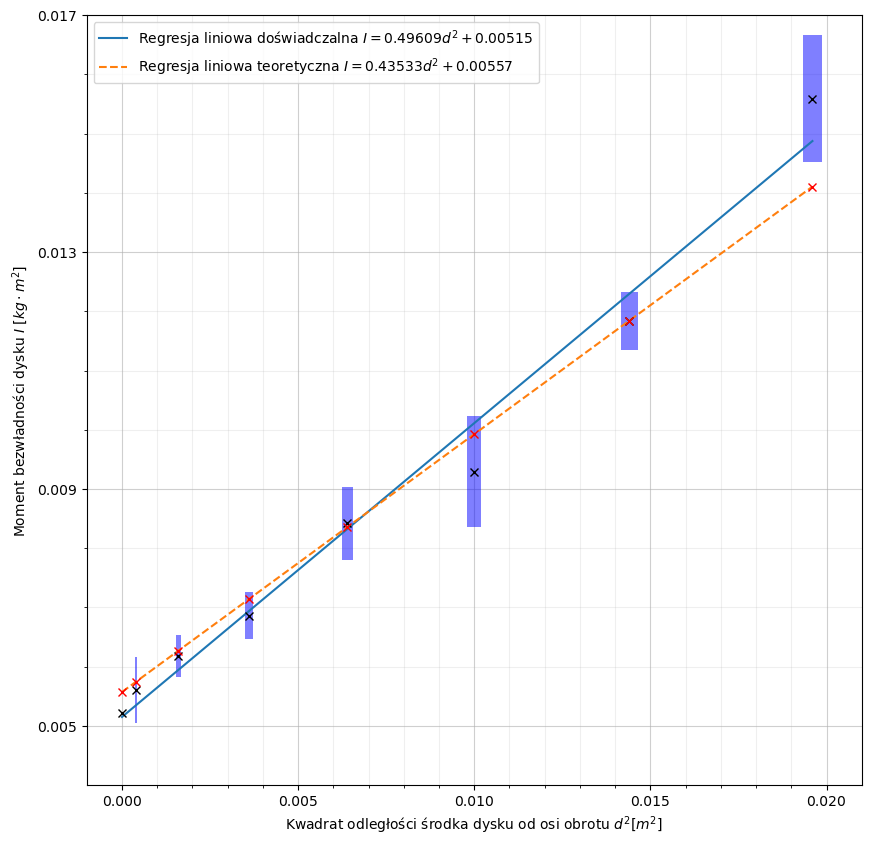

In [17]:
for obiekt in [dysk]:

    # Create figure and axes
    fig, ax = plt.subplots(1)

    # Set plot size
    fig.set_figwidth(10) 
    fig.set_figheight(10)

    # Grid
    # X axis
    major_xtick_spacing, minor_xtick_spacing, xmin, xmax = obiekt.grid.x_axis.__dict__.values()

    major_xticks = np.arange(xmin,xmax+minor_xtick_spacing,major_xtick_spacing)
    minor_xticks = np.arange(xmin,xmax+minor_xtick_spacing,minor_xtick_spacing)

    # Y axis
    major_ytick_spacing, minor_ytick_spacing, ymin, ymax = obiekt.grid.y_axis.__dict__.values()

    major_yticks = np.arange(ymin,ymax+minor_ytick_spacing,major_ytick_spacing)
    minor_yticks = np.arange(ymin,ymax+minor_ytick_spacing,minor_ytick_spacing)

    ax.set_xticks(major_xticks)
    ax.set_xticks(minor_xticks, minor=True)
    ax.set_yticks(major_yticks)
    ax.set_yticks(minor_yticks, minor=True)

    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.6)


    # Call function to create error boxes
    _ = make_error_boxes(ax, obiekt.x, obiekt.y, obiekt.xerr, obiekt.yerr)

    plt.plot(obiekt.x,obiekt.a*obiekt.x+obiekt.b, label=f"Regresja liniowa doświadczalna $I = {obiekt.a:.5f}d^2+{obiekt.b:.5f}$")  # plot measurement regression line

    plt.plot(teoria.x,teoria.a*teoria.x+teoria.b, linestyle='dashed', label=f"Regresja liniowa teoretyczna $I = {teoria.a:.5f}d^2+{teoria.b:.5f}$")  # plot theoretical regression line
    
    plt.plot(obiekt.x,obiekt.y,'kx') # plot measurement points

    plt.plot(obiekt.x,dysk.dane["I teoria [kg*m^2]"],'rx') # plot theoretical points

    plt.axis([xmin-minor_xtick_spacing,xmax+minor_xtick_spacing, ymin-minor_ytick_spacing,ymax])

    # Adding labels
    ax.set_ylabel(f"Moment bezwładności {obiekt.conjugated_name}"+r" $I$ $[kg \cdot m^2]$")
    ax.set_xlabel(f"{obiekt.x_axis_description}")

    ax.legend(loc=2)
    plt.savefig(f"wykres_{obiekt.ascii_name}.svg",format="svg", bbox_inches='tight', pad_inches=0)
    
    plt.show()
